In [1]:
# Importing required libraries
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import datetime as dt1
from datetime import datetime as dt
import quandl
import datetime

# Getting the google dataset
# and store it in the variable 'df'
df = quandl.get("WIKI/GOOG")

print(df.tail())


/home/cosmin/Documents/Facultate/SI/Proiect2/ML-stock-market-prediction/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1092.74  1106.30  1085.15  1090.88  1640709.0          0.0   
2018-03-22  1081.88  1082.90  1045.91  1049.08  2580374.0          0.0   
2018-03-23  1047.03  1063.36  1021.22  1021.57  2113497.0          0.0   
2018-03-26  1046.00  1055.63  1008.40  1053.21  2558385.0          0.0   
2018-03-27  1063.00  1064.84   996.92  1005.10  3029471.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1092.74    1106.30   1085.15     1090.88   
2018-03-22          1.0    1081.88    1082.90   1045.91     1049.08   
2018-03-23          1.0    1047.03    1063.36   1021.22     1021.57   
2018-03-26          1.0    1046.00    1055.63   1008.40     1053.21   
2018-03-27          1.0    1063.00    1064.84    996.92

In [2]:
# We are gonna use Adj. Close in order to predict the stock
df = df[['Adj. Close']]

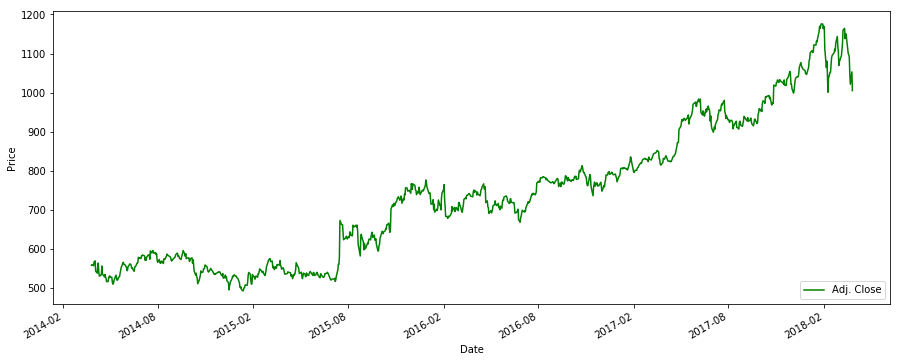

In [3]:
# forecast_out variable is keeping track of how many days into the future we want to predict
forecast_out = int(30) # 30 days into the future
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

# printing a plot to show the evolution of Google stock in time
df['Adj. Close'].plot(figsize=(15, 6), color="green")
# creating the labels 
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
X = np.array(df.drop(['Prediction'], 1))
# scaling our features to normalize data
X = preprocessing.scale(X)
X

array([[-1.01398948],
       [-1.00530839],
       [-1.02244361],
       ...,
       [ 1.61365657],
       [ 1.79317919],
       [ 1.52020722]])

In [5]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

# y is going to be our prediction array 
Y = np.array(df['Prediction'])
Y = Y[:-forecast_out]
print(Y)

[ 518.73    529.92    533.09    526.65    519.98    520.63    528.86
  529.77    538.94    545.06    552.7     565.95    561.68    560.08
  559.89    553.93    544.94    544.66    553.9     556.33    562.12
  560.55    558.84    551.35    551.76    544.28    543.01    553.37
  554.9     556.36    564.95    564.62    578.65    576.      577.24
  575.28    582.67    582.335   584.73    582.25    571.09    576.08
  571.1     579.18    584.87    584.78    582.66    573.7299  595.08
  589.47    594.74    595.98    593.35    589.02    590.6     585.61
  587.42    571.6     566.07    573.15    565.07    566.374   563.36
  568.77    567.88    562.73    574.78    574.65    573.48    582.16
  586.86    584.49    583.37    582.56    580.2     577.86    571.
  569.2     571.6     577.33    577.94    581.98    586.08    589.72
  581.01    583.1     581.35    575.62    573.1     579.95    584.77
  589.27    596.08    587.37    581.13    587.99    575.06    577.1
  576.36    577.36    568.27    570.0

In [6]:
# we take 20% of the train data and use it for prediction
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.3)

# LINEAR REGRESSION 
# Training our algorithm
clf = LinearRegression()
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Accuracy: ", accuracy)


Accuracy:  0.9380115919367781


In [7]:
# showing the last 30 days
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[1075.49981765 1093.50455763 1113.78035003 1119.18177202 1127.0179259
 1136.10213561 1131.28382168 1151.90743292 1169.25745508 1143.21196191
 1129.34012816 1093.32041824 1102.93658618 1115.22277522 1119.44775114
 1134.36304141 1151.09926561 1185.92206952 1190.48463431 1163.54913411
 1175.1294555  1175.22152519 1161.05302243 1124.3172149  1122.1586921
 1115.17162539 1072.41036795 1044.26773178 1076.63534387 1027.41897795]


Last date:  2018-02-12 00:00:00


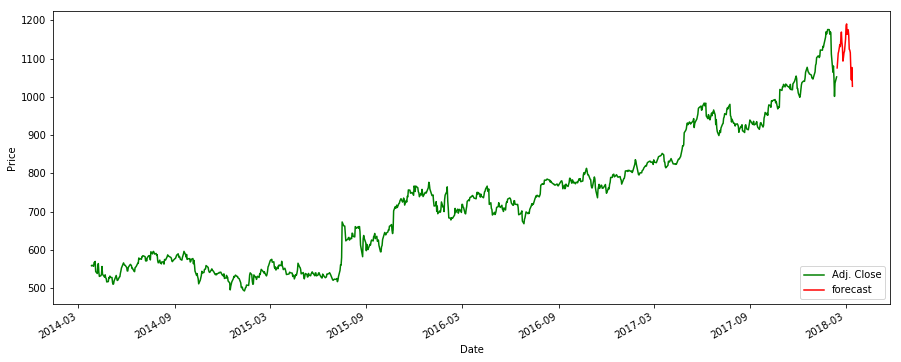

In [8]:
# Ploting th epredicted prices
df.dropna(inplace=True)
# initialiseing a new column called forecast with nan
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

print('Last date: ',last_date)
# print('Last unix: ', last_unix)


# adding predictions to the data frame to create the next 30 days
for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Adj. Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="red")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# SUPORT VECTOR MACHINE PREDICTION
